# House Prices
## 2. House Prices EDA
[캐글]: https://www.kaggle.com/c/house-prices-advanced-regression-techniques <br>
[참고 커널모음] :https://subinium.github.io/kaggle-tutorial/house-prices <br>

#### Python Tutorials
아래 튜토리얼 하나씩 필사할 예정

> * Comprehensive Data Exploration with Python (필사 시작일 : 2020-09-01)
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

> * House Prices EDA (필사 시작일 : 2020-09-04)
https://www.kaggle.com/dgawlik/house-prices-eda

> * A Study on Regression Applied to the Ames Dataset
https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

> * Regularized Linear Models
https://www.kaggle.com/apapiu/regularized-linear-models



--------------------------------------------------------------------------------------------------
## What I learned
* type here

--------------------------------------------------------------------------------------------------




In [36]:
conda install -c conda-forge xgboost

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::astropy==4.0=py36h1de35cc_0
  - defaults/osx-64::imageio==2.6.1=py36_0
  - defaults/osx-64::datashape==0.5.4=py36_1
  - defaults/osx-64::scipy==1.4.1=py36h9fa6033_0
  - defaults/osx-64::pandas==1.0.0=py36h6c726b0_0
  - defaults/osx-64::_anaconda_depends==2019.03=py36_0
  - defaults/osx-64::blaze==0.11.3=py36_0
  - defaults/osx-64::patsy==0.5.1=py36_0
  - defaults/osx-64::numexpr==2.7.1=py36hce01a72_0
  - defaults/osx-64::numpy-base==1.18.1=py36h6575580_1
  - defaults/osx-64::pywavelets==1.1.1=py36h1de35cc_0
  - defaults/noarch::pytest-doctestplus==0.5.0=py_0
  - defaults/noarch::pytest-astropy==0.7.0=py_0
  - defaults/osx-64::anaconda==custom=py36_1
  - defaults/osx-64::h5py==2.8.0=py36h878fce3_3
  - defaults/osx-64::pytest-arraydiff==0.3=py36h39e3cac_0
  - defaults/osx-64::odo==0.5.1=py36hc1af34a_0
  - defaults/osx

        last_spec = MatchSpec.union((path[-1], target_paths[-1][-1]))[0]
      File "/Users/suhyun/anaconda3/lib/python3.6/site-packages/conda/models/match_spec.py", line 481, in union
        return cls.merge(match_specs, union=True)
      File "/Users/suhyun/anaconda3/lib/python3.6/site-packages/conda/models/match_spec.py", line 475, in merge
        reduce(lambda x, y: x._merge(y, union), group) if len(group) > 1 else group[0]
      File "/Users/suhyun/anaconda3/lib/python3.6/site-packages/conda/models/match_spec.py", line 475, in <lambda>
        reduce(lambda x, y: x._merge(y, union), group) if len(group) > 1 else group[0]
      File "/Users/suhyun/anaconda3/lib/python3.6/site-packages/conda/models/match_spec.py", line 502, in _merge
        final = this_component.union(that_component)
      File "/Users/suhyun/anaconda3/lib/python3.6/site-packages/conda/models/match_spec.py", line 764, in union
        return '|'.join(options)
    TypeError: sequence item 0: expected str instance

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
#import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
pd.options.display.max_rows=1000
pd.options.display.max_columns=20

train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

# 정량적 변수
quantitative=[f for f in train.columns if train.dtypes[f]!='object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
# 정성적 변수
qualitative=[f for f in train.columns if train.dtypes[f]=='object']

In [3]:
train.shape

(1460, 81)

In [4]:
len(quantitative)

36

In [6]:
len(qualitative)

43

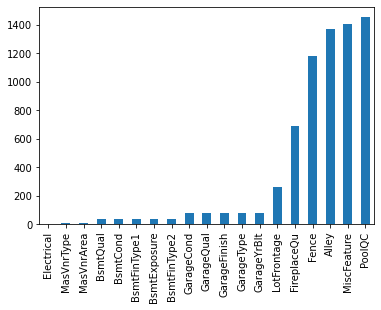

In [7]:
missing=train.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar();

* 19개의 변수에서 결측치가 나타났다. 그중 5개는 50%이상이 결측치.

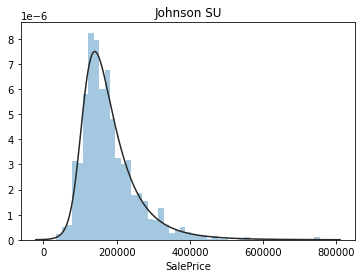

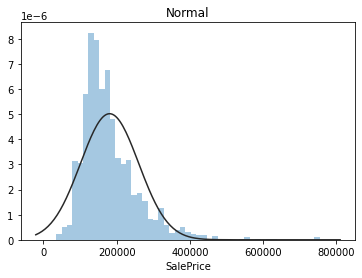

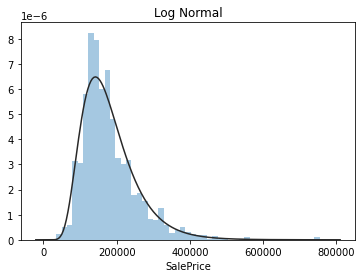

In [14]:
import scipy.stats as st
y=train['SalePrice']
plt.figure(1);plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu);
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm);
plt.figure(3); plt.title('Log Normal')
sns.distplot(y,kde=False, fit=st.lognorm)

* SalePrice는 정규분포를 따르지 않는다. 로그변환이 효과가 있어보임.

In [33]:
# shapiro테스트를 위해 결측치는0으로채워준것. 
## p-value가 0.01보다 작으면 정규분포를 따르지 않는다. 

test_normality=lambda x: stats.shapiro(x.fillna(0))[1] <0.01   # True,False값 반환.
normal=pd.DataFrame(train[quantitative])
normal=normal.apply(test_normality)
print(not normal.any())

False


* quantitive(정량적) 변수들중에 정규분포를 따르는것이 하나도없으므로, 이또한transform이 필요.

In [14]:
pd.melt(train, value_vars=quantitative)

,variable,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0
...,...,...
52555,YrSold,2007.0
52556,YrSold,2010.0
52557,YrSold,2010.0
52558,YrSold,2010.0


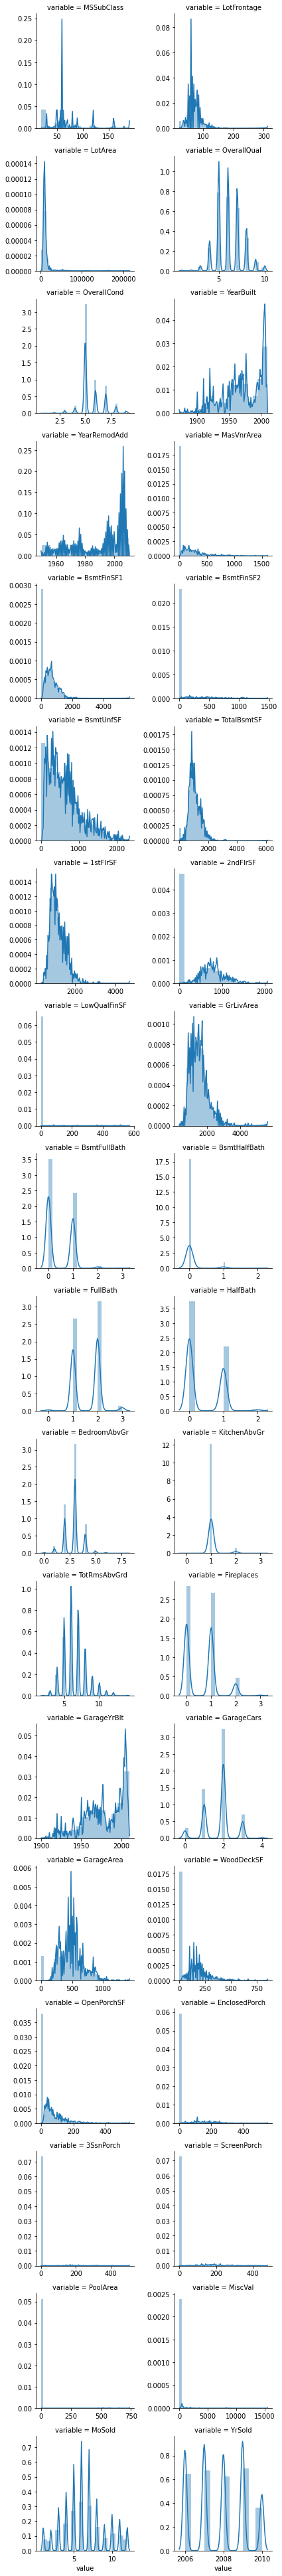

In [28]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value",kde_kws={'bw':0.1})

몇몇 독립변수들은 로그변환이 필요해보인다. TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea <br>
불규칙한 양상의 변수들은 feature construnction의 후보일 수 있다.

------------------------------------------------------------------------------------
## Categorical data
질적 변수들로는 두가지를 시행해볼 수 있다. <br>
* 하나는, 각 변수값에 대해 SalePrice의 분포를 체크하는 것이고
* 다른 하나는, 각 카테고리 별로 더미변수를 생성하는 것이다.

In [71]:
train['BsmtQual']=train['BsmtQual'].astype('category')

In [72]:
# dtype:object -> dtype:category로 변경.
train['BsmtQual']

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: category
Categories (4, object): [Ex, Fa, Gd, TA]

In [79]:
train['BsmtQual']=train['BsmtQual'].cat.add_categories(['MISSING'])

In [80]:
# category에 MISSING추가됨.
train['BsmtQual']

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: category
Categories (5, object): [Ex, Fa, Gd, TA, MISSING]

**qualitative변수들을 category형태로 바꾸고, MISSING카테고리 추가하여 결측치를 MISSING으로 채운다**

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


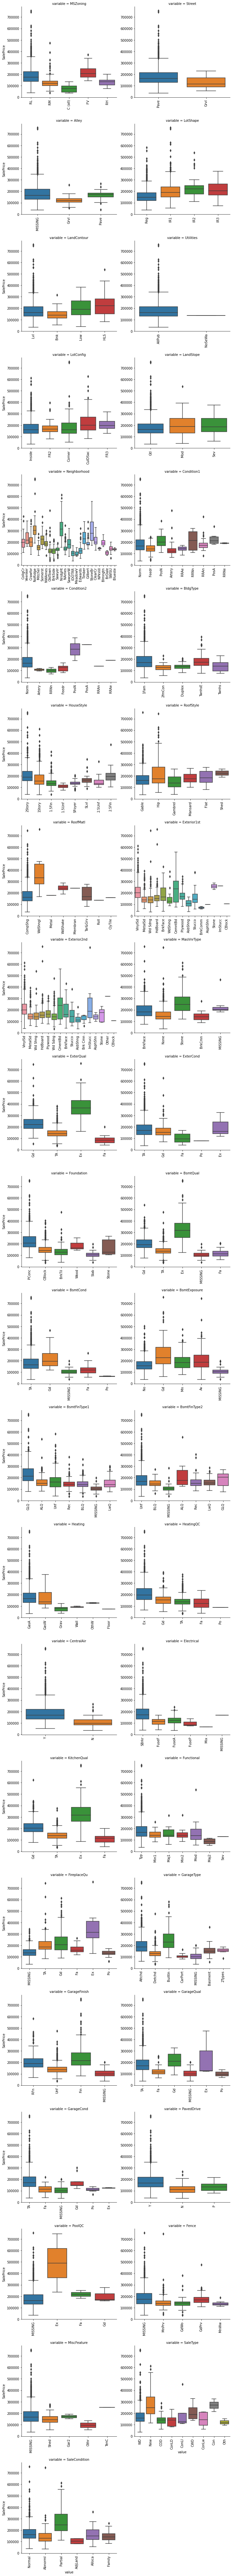

In [102]:
# 카테고리 변수의 결측치 채우기
for c in qualitative:
    train[c] = train[c].astype('category')   # object타입을 category타입으로 변경.
    if train[c].isnull().any():   # 결측이 하나라도 있으면
        train[c]=train[c].cat.add_categories(['MISSING'])    # MISSING이라는 카테고리를 추가
        train[c]=train[c].fillna('MISSING')   # 결측치에 MISSING값 대체
        
# 시각화
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
f=pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
g=sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False,size=5)
g=g.map(boxplot,"value","SalePrice")

몇몇 카테고리는 SalePrice에 대하여 굉장히 다양하다. Neighborhood는 집값에 큰 영향을 준다.<br>
Pool이 있는것이 가격 상승에 요인이되는것으로 보임. 또한 카테고리 변수 사이에 산포도에도 차이가 있다.

In [93]:
# melt로 변수들을 행값으로 내려줌.
f=pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
f

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL
...,...,...,...
62775,175000,SaleCondition,Normal
62776,210000,SaleCondition,Normal
62777,266500,SaleCondition,Normal
62778,142125,SaleCondition,Normal


In [100]:
# 결측치가 MISSING으로 채워짐.
f.query('value=="MISSING"')

,SalePrice,variable,value
2920,208500,Alley,MISSING
2921,181500,Alley,MISSING
2922,223500,Alley,MISSING
2923,140000,Alley,MISSING
2924,250000,Alley,MISSING
...,...,...,...
59854,185000,MiscFeature,MISSING
59855,175000,MiscFeature,MISSING
59856,210000,MiscFeature,MISSING
59858,142125,MiscFeature,MISSING


#### ANOVA분석으로 종속변수에 영향을 미치는 변수 판별
* 각 정성적 변수에서 카테고리(그룹)별 SalesPrice의 평균값에 차이가있는지를 ANOVA로 검정.
* 컬럼안에 카테고리에 따라 SalesPrice가 다르다면, 해당 변수는 SalePrice에 영향을 미친다고 볼수있다.

SalePrice에 영향을 미치는 categorical 변수를 추정한것이다.<br>
category변수를 기반으로 SalePrices가 분명한 셋으로 나누어졌다. <br>
set이 비슷한 분포를 갖고있는지 ANOVA테스트로  확인한다.<br>
만약 변수 영향력이 적다면, set의 평균은 동일해야한다.<br>
p-value의 하강은 parition에서 다양성이 상승한다는 것을 의미한다.

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


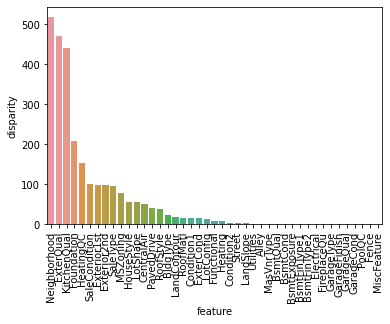

In [43]:
def anova(frame):
    anv=pd.DataFrame()
    anv['feature']=qualitative
    pvals=[]
    for c in qualitative:   # c=정성적 변수에 대한 컬럼명
        samples=[]
        for cls in frame[c].unique(): # cls= 정석적 변수 컬럼안에 유니크한 값들.
            s=frame[frame[c]==cls]['SalePrice'].values  # s=해당 컬럼에 특정값일때의 SalePrice값.
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a=anova(train)
a['disparity']=np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature',y='disparity')
x=plt.xticks(rotation=90)

In [39]:
train['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [28]:
train[train['SaleType']=='WD']['SalePrice'].values

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [23]:
for c in qualitative:
    samples=[]
    for cls in train[c].unique():
        print(cls)

RL
RM
C (all)
FV
RH
Pave
Grvl
nan
Grvl
Pave
Reg
IR1
IR2
IR3
Lvl
Bnk
Low
HLS
AllPub
NoSeWa
Inside
FR2
Corner
CulDSac
FR3
Gtl
Mod
Sev
CollgCr
Veenker
Crawfor
NoRidge
Mitchel
Somerst
NWAmes
OldTown
BrkSide
Sawyer
NridgHt
NAmes
SawyerW
IDOTRR
MeadowV
Edwards
Timber
Gilbert
StoneBr
ClearCr
NPkVill
Blmngtn
BrDale
SWISU
Blueste
Norm
Feedr
PosN
Artery
RRAe
RRNn
RRAn
PosA
RRNe
Norm
Artery
RRNn
Feedr
PosN
PosA
RRAn
RRAe
1Fam
2fmCon
Duplex
TwnhsE
Twnhs
2Story
1Story
1.5Fin
1.5Unf
SFoyer
SLvl
2.5Unf
2.5Fin
Gable
Hip
Gambrel
Mansard
Flat
Shed
CompShg
WdShngl
Metal
WdShake
Membran
Tar&Grv
Roll
ClyTile
VinylSd
MetalSd
Wd Sdng
HdBoard
BrkFace
WdShing
CemntBd
Plywood
AsbShng
Stucco
BrkComm
AsphShn
Stone
ImStucc
CBlock
VinylSd
MetalSd
Wd Shng
HdBoard
Plywood
Wd Sdng
CmentBd
BrkFace
Stucco
AsbShng
Brk Cmn
ImStucc
AsphShn
Stone
Other
CBlock
BrkFace
None
Stone
BrkCmn
nan
Gd
TA
Ex
Fa
TA
Gd
Fa
Po
Ex
PConc
CBlock
BrkTil
Wood
Slab
Stone
Gd
TA
Ex
nan
Fa
TA
Gd
nan
Fa
Po
No
Gd
Mn
Av
nan
GLQ
ALQ
Unf
Rec
BLQ
nan
Lw

In [31]:
for c in qualitative:   # c=정성적 변수에 대한 컬럼명
    samples=[]
    for cls in train[c].unique(): # cls= 정석적 변수 컬럼안에 유니크한 값들.
        s=train[train[c]==cls]['SalePrice'].values  # s=해당 컬럼에 특정값일때의 SalePrice값.
        samples.append(s)
print(samples)

[array([208500, 181500, 223500, ..., 266500, 142125, 147500]), array([140000, 129900, 139000, 109000, 160000, 239686, 172500,  85000,
        98600,  83000, 217000, 150000, 125000, 235000, 104000,  97000,
       112000, 290000, 220000, 149900, 190000, 130000, 125000, 100000,
        67000, 258000,  60000,  85400,  79900,  98000,  34900, 158000,
       175000, 140000, 120000, 118500, 164500, 146000, 220000, 137500,
       124000, 200000,  97500, 129000, 159434, 108480, 109900, 102776,
       110000, 132000, 158900, 107000, 110000, 185000, 170000,  66500,
       328900, 106500,  88000,  35311, 175000, 150000, 137500, 119900,
        37900, 135000, 110000, 121600,  86000, 187500, 287000, 310000,
        84900, 180000, 138800, 145000, 157000, 181000, 112000,  93500,
       119000, 139000, 230000, 745000,  95000, 116050,  91500, 115000,
       142000, 130000, 142500, 178000, 181000,  68400, 144152, 193000,
       257000, 119000, 174000,  92000,  84500]), array([345000, 279500, 325300, 11300

In [40]:
anova(train).head()

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


,feature,pval
8,Neighborhood,1.558600e-225
18,ExterQual,1.439551e-204
30,KitchenQual,3.032213e-192
20,Foundation,5.791895e-91
27,HeatingQC,2.667062e-67


In [50]:
def encode(frame, feature):
    ordering=pd.DataFrame()
    ordering['val']=frame[feature].unique()   # 정성적 변수의 유니크한 값들을 val변수로 저장.
    ordering.index=ordering.val  # 변수를 인덱스로
    ordering['spmean']=frame[[feature,'SalePrice']].groupby(feature).mean() # 변수 카테고리별 SalePrice평균
    ordering=ordering.sort_values('spmean')
    ordering['ordering']=range(1,ordering.shape[0]+1)
    ordering=ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature]==cat, feature+'_E']=o
qual_encoded=[]
for q in qualitative:
    encode(train,q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [48]:
train[['SaleCondition','SalePrice']].groupby('SaleCondition').mean()

,SalePrice
SaleCondition,
Abnorml,146526.623762
AdjLand,104125.000000
Alloca,167377.416667
Family,149600.000000
Normal,175202.219533
Partial,272291.752000


------------------------------------------------------------------------------------
## Correlations